<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [76]:
##### Begin Working Here #####
# Working with the Ames Iowa Housing Dataset:
import pandas as pd
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
iowa_df = pd.read_csv(source_url)
# first few rows
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# shape
iowa_df.shape

(1460, 81)

In [7]:
# describe
iowa_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
iowa_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [12]:
# Specific Columns hold specific kinds of data
pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_rows', 100)
# to view a continuous columns types w/o breaks
iowa_df.dtypes[:7] 
# to truncate list to see the 1st 7
# iowa_df.dtype() to see all columns

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [15]:
# Look at the first ten rows of the 'BedroomAbvGr' column
# Looks like integers to me!
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(4)
## [[double square brackets]] is a DataFrame
#### This is a way to Call a Column

,BedroomAbvGr,Fireplaces
905,3,0
42,2,0
1048,3,1
1110,3,1


In [16]:
# another way to call columns: dot method
iowa_df.Fireplaces.sample(4)

609     0
684     0
1335    1
488     1
Name: Fireplaces, dtype: int64

In [0]:
# this example shows the reason DOT Method will be DEPRECATED
iowa_df['fire places are nice and hot'] = iowa_df['Fireplaces']

In [18]:
iowa_df[['fire places are nice and hot','Fireplaces', 'BedroomAbvGr']].head(2)

,fire places are nice and hot,Fireplaces,BedroomAbvGr
0,0,0,3
1,1,1,3


In [20]:
# now using the Dot Method
iowa_df.Fireplaces.head(2)
# but using the new column heading with spaces 
# it gives a SyntaxError: invalid syntax
# iowa_df.Fireplfire places are nice and hotaces.head(2)

0    0
1    1
Name: Fireplaces, dtype: int64

In [21]:
# Some Columns hold float values like LotFrontage
iowa_df['LotFrontage'].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

In [22]:
iowa_df['LotFrontage'].value_counts(dropna=False)
# dropna = False   to show missing values

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [25]:
# NaN are float
import numpy as np
type(np.NaN)
#This is the reason the column has a float type

float

In [26]:
# how much missing data 
iowa_df['LotFrontage'].isnull().sum()

259

In [0]:
# drop missing data
iowa_df['LotFrontage'].dropna(inplace=True)
# treat missing data differently dependant on case
# impute data = insert mean or average to make sense
# replace data

In [31]:
# check now how much missing data?
iowa_df['LotFrontage'].isnull().sum()

0

In [35]:
### Making New Features
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
##### Make sure to use .copy()
small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1326,544,774,0,79000
115,729,729,729,176000
1185,784,949,272,104900


In [0]:
# Addding all the square footage to get a New 'TotalSquareFootage' column
small_df['TotalSquareFootage'] = iowa_df['TotalBsmtSF'] + iowa_df['1stFlrSF'] + iowa_df['2ndFlrSF']

In [37]:
# Figure out the PricePerSqFt
small_df['PricePerSF'] = small_df['SalePrice'] / small_df['TotalSquareFootage']
small_df.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235


In [38]:
## crosstabs with dataframe
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
# what are some categorical columns?
iowa_df[['LotShape','Alley', 'Street', 'SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [41]:
# values of sale condition
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [42]:
# create a new categorical variable
# Assign Values for 2 different VALUES like 'yes' and 'no'
### Normal  1198
### everything else
iowa_df['NormalCondition'] = np.where(iowa_df['SaleCondition']=='Normal', 'Yes', 'No')
iowa_df['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [43]:
# value counts of a categorical variable
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
# Map this from four down to 3 values
# Map is good for multiple value
iowa_df['LotShape3'] = iowa_df['LotShape'].map({'Reg':'Regular',
                                                'IR1':'Irregular',
                                                'IR2':'Other',
                                                'IR3':'Other'})

In [46]:
 # values - check mapping
 iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [47]:
# value counts of a categorical variable
# Note the original col still contain the original values
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [51]:
# one more way to map categorical variables
# for many values like 50 different options
iowa_df['Neighborhood'].value_counts()
iowa_df['Neighborhood'].value_counts().head(6) # comment this out to see the rest of the values

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Neighborhood, dtype: int64

In [56]:
iowa_df['top_neighbors'] = 'All other'  # this is a default value for all
# these are filter to catch the TOP NEIGHBORHOOD
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'top_neighbors']='north ames neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='CollgCr', 'top_neighbors']='creek neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='Gilbert', 'top_neighbors']='gilbert neighbors'
iowa_df['top_neighbors'].value_counts()

All other               1006
north ames neighbors     225
creek neighbors          150
gilbert neighbors         79
Name: top_neighbors, dtype: int64

In [57]:
# crosstab
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All other,312,27,667
creek neighbors,53,11,86
gilbert neighbors,53,11,15
north ames neighbors,66,2,157


In [58]:
# margins - option to crosstabs
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All other,312,27,667,1006
creek neighbors,53,11,86,150
gilbert neighbors,53,11,15,79
north ames neighbors,66,2,157,225
All,484,51,925,1460


In [61]:
# as proportions (percentages)
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All other,0.310139,0.026839,0.663022
creek neighbors,0.353333,0.073333,0.573333
gilbert neighbors,0.670886,0.139241,0.189873
north ames neighbors,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


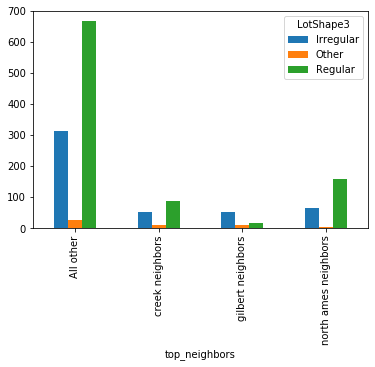

In [63]:
# display that (as a plot)
myresults = pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])
myresults.plot(kind='bar');

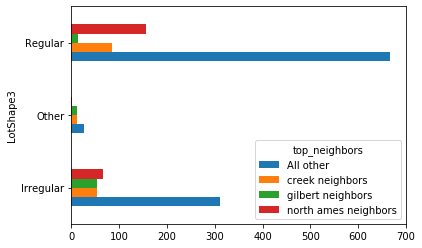

In [64]:
# display that (as a plot)
myresults = pd.crosstab(iowa_df['LotShape3'], iowa_df['top_neighbors'])
myresults.plot(kind='barh');

###Working with Strings with Pandas

In [73]:
# load a new dataset
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-14 15:33:03--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.71M   820KB/s    in 27s     

2020-03-14 15:33:31 (810 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [74]:
# unzip
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [92]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
print(loans_df.shape)
loans_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128287, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid         n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100   

In [93]:
# everything is bold. it thinks the whole file is a column
# the 1st two column are NaNs
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(loans_df.shape)
loans_df.head()

(128284, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loans_df.tail ()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,6168.49,6168.49,5687.89,5687.89,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# check all the NaN values
# Sum null values by column and sort from least to greatest
# pd.set_option('display.max_rows', 100)
# pd.options.display.max_rows = 100
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [95]:
# Address the extra NaNs in each column by skipping the footer as well
# we took care of the footer above when we read_csv()
# for all the rows, url, member_id, desc,  id are NaN - time to clean 
loans_df = loans_df.drop(['url', 'member_id', 'desc', 'id'], axis=1)
print(loans_df.shape)
loans_df.head()

(128284, 140)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,661.06,0.0,0.0,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,2088.11,704.14,0.0,0.0,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,49.22,0.0,0.0,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,3024.11,2823.94,0.0,0.0,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,3570.42,8333.23,0.0,0.0,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Clean up the int_rate column
# Look at the first 10 values of the int_rate column
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [98]:
# Look at a specific value from the int_rate column
loans_df['int_rate'][3]

' 14.47%'

In [99]:
type(loans_df['int_rate'][3])

str

In [0]:
# 1. string type should be numeric
# 2. percent sign % 
# Leading space

In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix them all.
int_rate = ' 14.47%'

In [102]:
# remove leading space
int_rate.strip()

'14.47%'

In [104]:
# remove percent
int_rate.strip('%')

' 14.47'

In [105]:
# remove both - chain the strip methods


'14.47'

In [108]:
# "Cast" the string value to a float
float('14.47')

14.47

In [109]:
# Put it all together
float(int_rate.strip().strip('%'))

14.47

In [0]:
# Write a function ro make our solution reusable

# Write a function that can do what we have written above to any
#string that is passed to it.

def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [111]:
# Test our our function by calling it on our example
myfunc(int_rate)

14.47

In [112]:
# is the data type corrent?
type(myfunc(int_rate))

float

In [0]:
### Apply our solution to every cell in a column

#for loop
new_list = []

for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [114]:
# Look at the first 10 values of that list
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [115]:
# compare to original values
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [116]:
# Convert that list to a new colummn
# convert list to a pandas series then pass to Dataframe
loans_df['int_rate_cleaned'] = pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [118]:
# What type of data is held in our new column?
loans_df[['int_rate', 'int_rate_cleaned']].dtypes

int_rate             object
int_rate_cleaned    float64
dtype: object

In [120]:
#improve all of this code with the .apply function!

loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned2
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [121]:
### CLEAN the 'Employment Title' Column

# Look at the top 20 employment titles
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [126]:
# How many different Top 20 employment titles
# also Value Count the NaN 
loans_df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [128]:
# How Many different unique employment titles are there currently?
#loans_df['emp_title'].unique()
len(loans_df['emp_title'].unique())

43852

In [129]:
# another way to do this
loans_df['emp_title'].nunique()

43851

In [130]:
# How often is the employment_title null?
loans_df['emp_title'].isnull().sum()

20922

In [0]:
# What are some possible reasons that represent as to 
# why a person's employment title may not be provided

# Create some examples that represetn the cases that we want to clean up

examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [132]:
# do the same function in individual steps
# isinstance is the inverse of type and re
print(type('Supervisor'))
isinstance('Supervisor', str)

<class 'str'>


True

In [133]:
# What about the strip and the capitalization(.title)

' superVisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up these case and increase uniformity
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  return "unknown"

In [136]:
# Test our function
clean_title(' superVisor')

'Supervisor'

In [141]:
# create a for loop
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [142]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
# We have a function that works as expected.  Lets apply it to our column.
# This time we'll overwrite the original column
# use .apply()

loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [144]:
# check our work
loans_df[['emp_title', 'emp_title_cleaned']].sample(10)

,emp_title,emp_title_cleaned
99973,Juvenile Probation Officer,Juvenile Probation Officer
79583,Caregiver,Caregiver
53744,NaN,unknown
54136,Area Supervisor,Area Supervisor
37280,Security Officer,Security Officer
103984,Table Games Dealer,Table Games Dealer
2382,Recruiting Manager,Recruiting Manager
46816,Senior Project Manager,Senior Project Manager
119682,Restaurant Manager,Restaurant Manager
104731,Orderfiller,Orderfiller


We can use the same code as we did earlier to see how much progress was made.

In [147]:
# How many different Top 20 employment titles
# also Value Count the NaN 
loans_df['emp_title_cleaned'].value_counts(dropna=False)[:20]

unknown               20922
Teacher                2553
Manager                2393
Registered Nurse       1416
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      832
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   623
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                411
Name: emp_title_cleaned, dtype: int64

In [148]:
# How many different unique employment titles are there currently?
loans_df['emp_title_cleaned'].nunique()

34877

In [152]:
# recoding a categorical

loans_df['new_emp_title']='All Others'
# this creates a new column
# filtering the columns data we need and bunching every thing else into All Others
loans_df.loc[loans_df['emp_title']=='Manager', 'new_emp_title']='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher', 'new_emp_title']='Teacher'
loans_df.loc[loans_df['emp_title']=='Driver', 'new_emp_title']='Driver'
loans_df.loc[loans_df['emp_title']=='Registered Nurse' 'new_emp_title']='Registered Nurse'
loans_df['new_emp_title'].value_counts()


All Others    123501
Teacher         2088
Manager         1771
Driver           924
Name: new_emp_title, dtype: int64

In [153]:
# how often is the employment_title null (NaN)?

loans_df['emp_title_cleaned'].isnull().sum()

0

Work with Dates in Pandas

In [157]:
# list all columns
# date column - end with _d
loans_df.columns[:30]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util'],
      dtype='object')

In [158]:
# Check out one column

loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [159]:
# as a for loop
mylist = []
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [162]:
# as a list comprehension
my_date_col = [col for col in loans_df.columns if col.endswith('_d')]
my_date_col

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [165]:
#lets look at the string format of the issue_d column
loans_df['issue_d'].dtype

dtype('O')

In [171]:
# type Object
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

In [173]:
# infer_datetime_format=True

loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

loans_df[['issue_d','new_issue_d']]

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01
...,...,...
128279,Oct-2018,2018-10-01
128280,Oct-2018,2018-10-01
128281,Oct-2018,2018-10-01
128282,Oct-2018,2018-10-01


In [176]:
# Check our work
print(loans_df['new_issue_d'].dtype)
type(loans_df['new_issue_d'][0])

datetime64[ns]


pandas._libs.tslibs.timestamps.Timestamp

In [177]:
# look at one value from the set - "cherry pick"
loans_df['new_issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [179]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [181]:
# We can use the .dt accessor to now grab specific parts of the
# datetime object. Lets grab just the year from 
# all of the cells in the issue_d column

loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df[['issue_d', 'new_issue_d','year']].sample(7)

,issue_d,new_issue_d,year
119230,Oct-2018,2018-10-01,2018
100045,Oct-2018,2018-10-01,2018
99547,Oct-2018,2018-10-01,2018
75369,Nov-2018,2018-11-01,2018
96751,Oct-2018,2018-10-01,2018
60197,Nov-2018,2018-11-01,2018
75239,Nov-2018,2018-11-01,2018


In [182]:
# now, the month using .dt.month

loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d','year', 'month']].sample(7)

,issue_d,new_issue_d,year,month
33253,Dec-2018,2018-12-01,2018,12
51922,Nov-2018,2018-11-01,2018,11
127829,Oct-2018,2018-10-01,2018,10
92320,Oct-2018,2018-10-01,2018,10
73948,Nov-2018,2018-11-01,2018,11
117656,Oct-2018,2018-10-01,2018,10
112326,Oct-2018,2018-10-01,2018,10


In [183]:
# now, the Weekday using .dt.weekday

loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d', 'new_issue_d','year', 'month', 'weekday']].sample(7)

,issue_d,new_issue_d,year,month,weekday
40284,Nov-2018,2018-11-01,2018,11,3
101613,Oct-2018,2018-10-01,2018,10,0
58106,Nov-2018,2018-11-01,2018,11,3
89154,Oct-2018,2018-10-01,2018,10,0
54794,Nov-2018,2018-11-01,2018,11,3
19952,Dec-2018,2018-12-01,2018,12,5
112736,Oct-2018,2018-10-01,2018,10,0


In [186]:
# same thing, diff var
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d', 'new_last_credit_pull_d']].head()

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


In [0]:
# date arithmetic
loans_df['day_diff'] = loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']

In [188]:
# check that out
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']]

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days
...,...,...,...
128279,Oct-2018,Nov-2018,-31 days
128280,Oct-2018,Jan-2020,-457 days
128281,Oct-2018,Jan-2020,-457 days
128282,Oct-2018,Jan-2020,-457 days


In [189]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [190]:
# What's oldest credit history that was involved in Q4 2018
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

In [0]:
# oldest is 488 days
# shortest is 61 days

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01